# MNIST
MNISTを全結合によって解く

# インポート

In [27]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG

# ハイパーパラメータの設定

In [2]:
batch_size = 128
num_classes = 10
epochs = 10

# データのロード

5


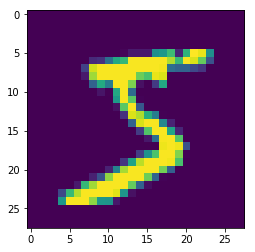

In [22]:
# the data, shuffled and split between train and test sets
(x_train_pre, y_train_pre), (x_test_pre, y_test_pre) = mnist.load_data()
plt.imshow(x_train_pre[0])
print(y_train_pre[0])

# データ前処理

In [16]:
x_train = x_train_pre.reshape(60000, 784) # 2次元配列を1次元に変換
x_test = x_test_pre.reshape(10000, 784)
x_train = x_train.astype('float32')   # int型をfloat32型に変換
x_test = x_test.astype('float32')
x_train /= 255                        # [0-255]の値を[0.0-1.0]に変換
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


# 正解ラベルの変換
ex) 5→[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]

In [12]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train_pre, num_classes)
y_test = keras.utils.to_categorical(y_test_pre, num_classes)

# モデル定義

In [13]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# モデル確認及びコンパイル

In [14]:
model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


# 学習

In [17]:
history = model.fit(x_train, y_train,  # 画像とラベルデータ
                    batch_size=batch_size,
                    epochs=epochs,     # エポック数の指定
                    verbose=1,         # ログ出力の指定. 0だとログが出ない
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 18s 295us/step - loss: 0.2450 - acc: 0.9254 - val_loss: 0.1191 - val_acc: 0.9609
Epoch 2/10
60000/60000 [==============================] - 15s 258us/step - loss: 0.1026 - acc: 0.9690 - val_loss: 0.0810 - val_acc: 0.9740
Epoch 3/10
60000/60000 [==============================] - 19s 314us/step - loss: 0.0749 - acc: 0.9776 - val_loss: 0.0731 - val_acc: 0.9775
Epoch 4/10
60000/60000 [==============================] - 19s 322us/step - loss: 0.0595 - acc: 0.9823 - val_loss: 0.0733 - val_acc: 0.9803
Epoch 5/10
60000/60000 [==============================] - 17s 286us/step - loss: 0.0497 - acc: 0.9852 - val_loss: 0.0833 - val_acc: 0.9783
Epoch 6/10
60000/60000 [==============================] - 15s 245us/step - loss: 0.0431 - acc: 0.9865 - val_loss: 0.0873 - val_acc: 0.9790
Epoch 7/10
60000/60000 [==============================] - 16s 274us/step - loss: 0.0395 - acc: 0.9884 - val_loss: 0.

# 学習曲線

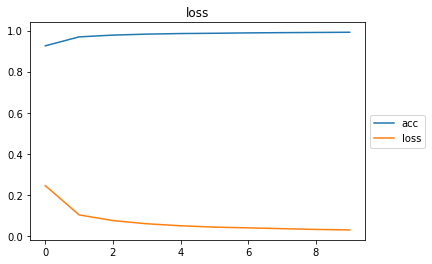

Test loss: 0.08288238008835028
Test accuracy: 0.983


In [21]:
x = range(epochs)
plt.plot(x, history.history['acc'], label="acc")
plt.title("accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.plot(x, history.history['loss'], label="loss")
plt.title("loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# テスト

6


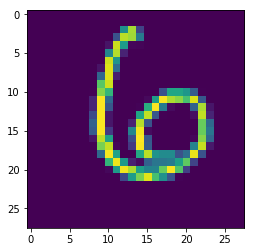

In [37]:
test_num = 100


predict_classes = model.predict_classes(x_test[[test_num],], batch_size=32)
plt.imshow(x_test_pre[test_num])
print(predict_classes[0])